In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:\\Users\\HP\\Documents\\ML\\Logistic Regression\\HR\\HR_comma_sep.csv"
data = pd.read_csv(file_path)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


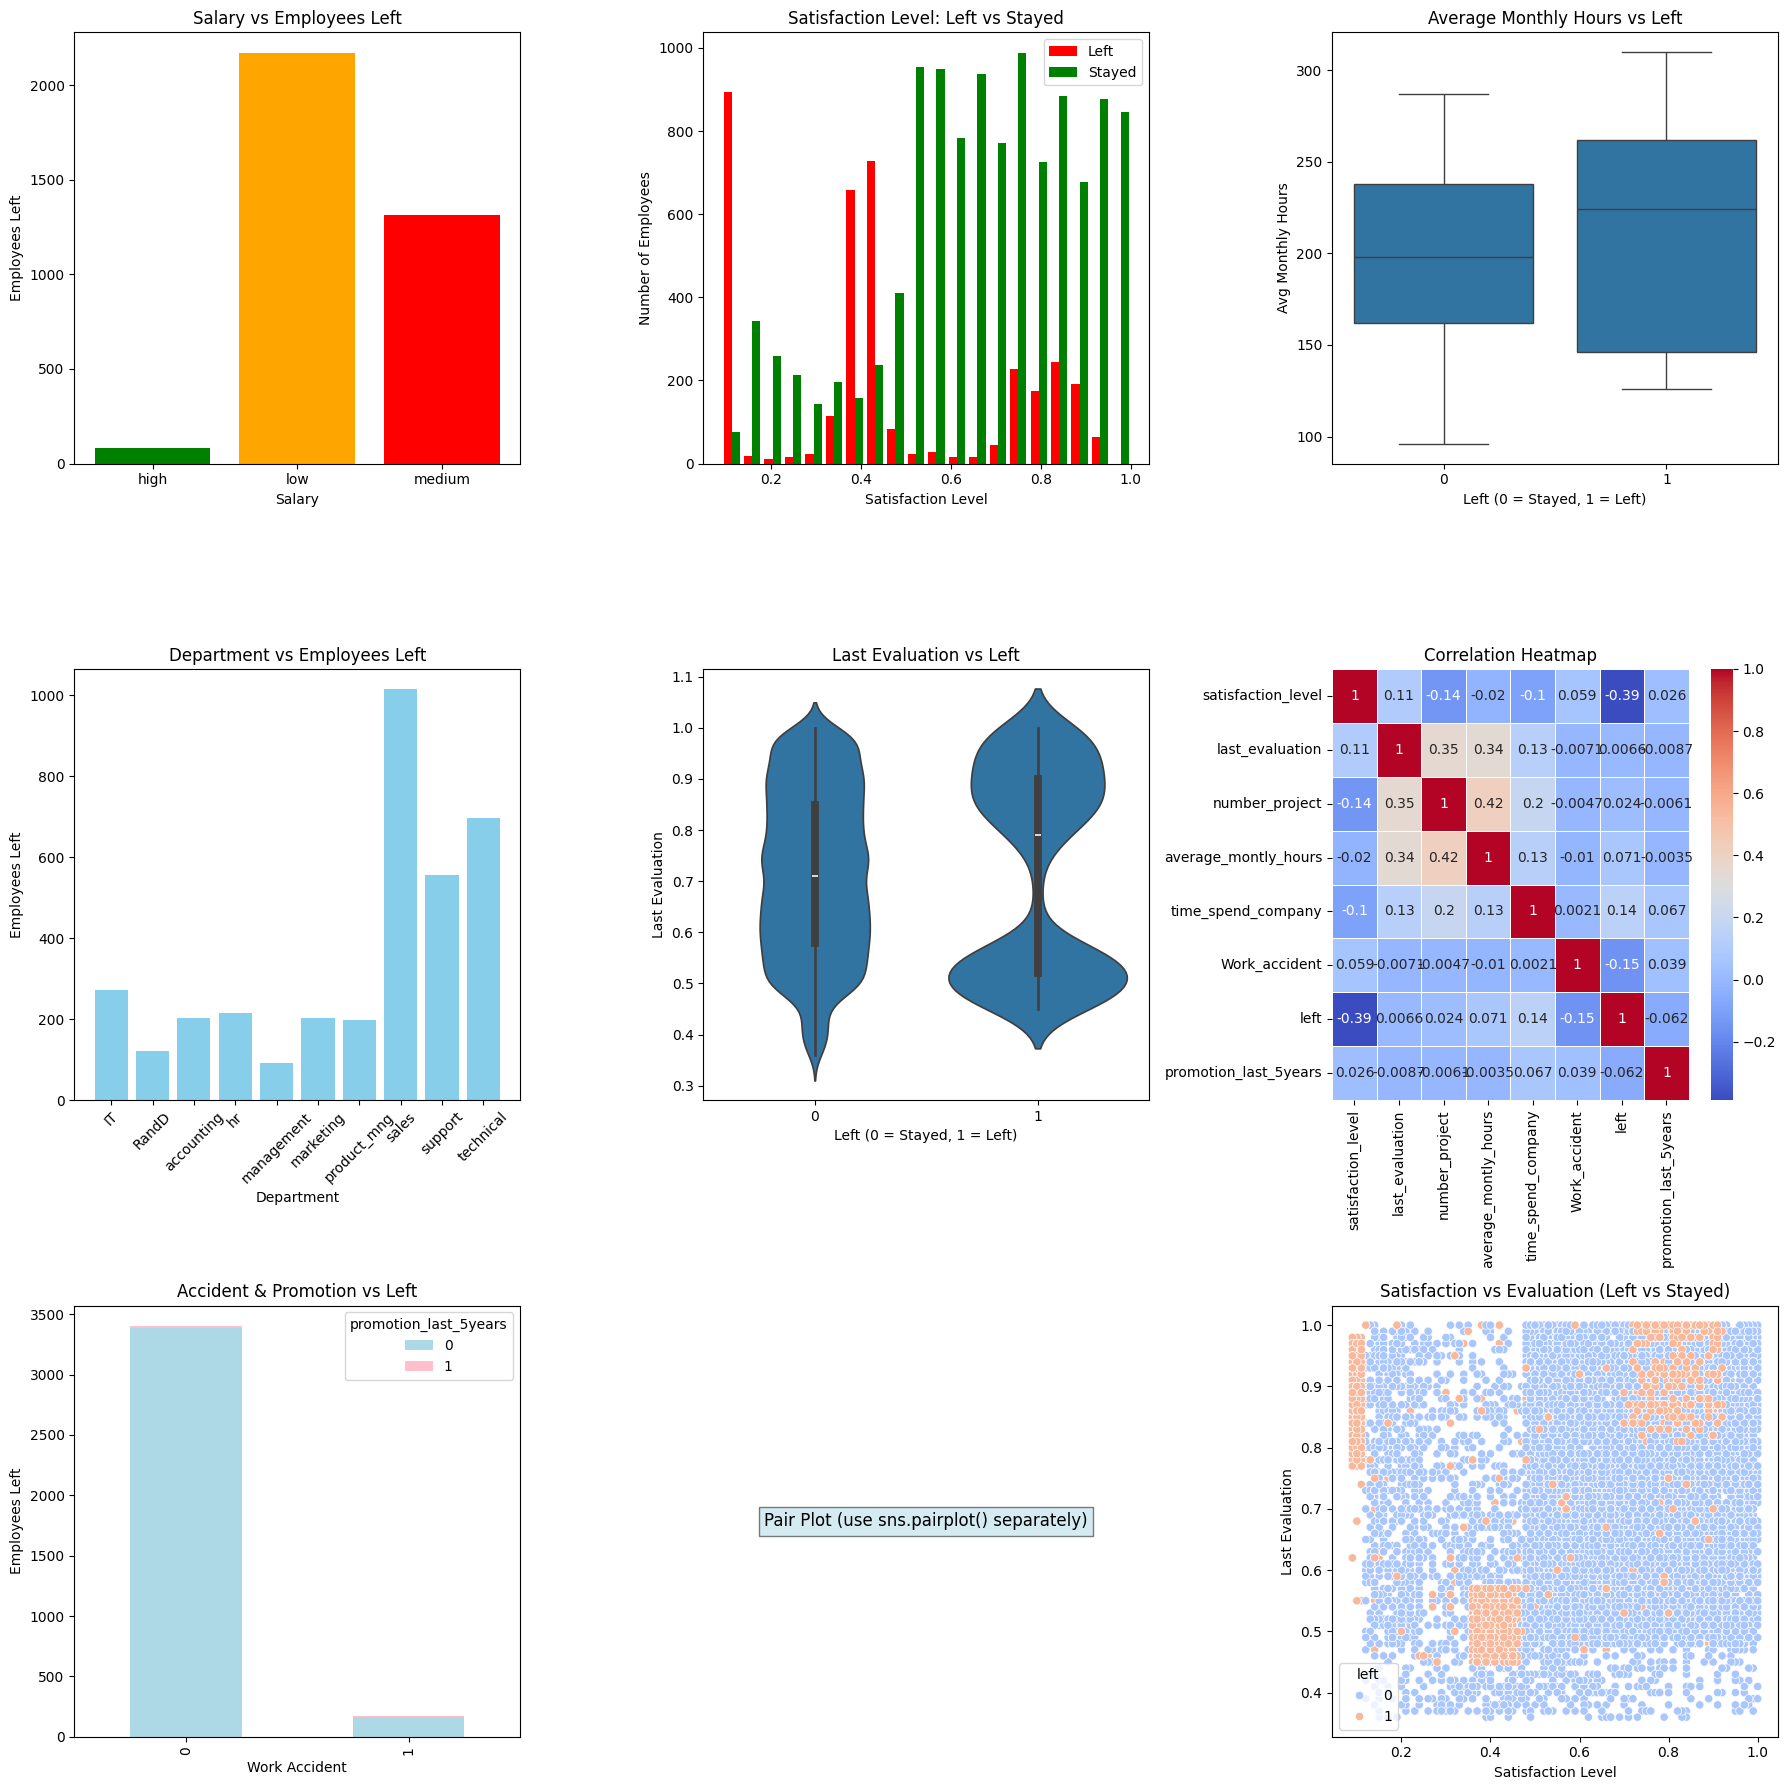

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18)) 

# 1. Bar Chart: Salary vs Employees Left
salary_left = data.groupby('salary')['left'].sum().reset_index()
axs[0, 0].bar(salary_left['salary'], salary_left['left'], color=['green', 'orange', 'red'])
axs[0, 0].set_title('Salary vs Employees Left')
axs[0, 0].set_xlabel('Salary')
axs[0, 0].set_ylabel('Employees Left')

# 2. Histogram: Satisfaction Level of Employees Who Left vs Stayed
axs[0, 1].hist([data[data['left'] == 1]['satisfaction_level'], data[data['left'] == 0]['satisfaction_level']], 
               bins=20, color=['red', 'green'], label=['Left', 'Stayed'])
axs[0, 1].set_title('Satisfaction Level: Left vs Stayed')
axs[0, 1].set_xlabel('Satisfaction Level')
axs[0, 1].set_ylabel('Number of Employees')
axs[0, 1].legend()

# 3. Box Plot: Average Monthly Hours vs Left
sns.boxplot(x='left', y='average_montly_hours', data=data, ax=axs[0, 2])
axs[0, 2].set_title('Average Monthly Hours vs Left')
axs[0, 2].set_xlabel('Left (0 = Stayed, 1 = Left)')
axs[0, 2].set_ylabel('Avg Monthly Hours')

# 4. Bar Plot: Department vs Employees Left
department_left = data.groupby('Department')['left'].sum().reset_index()
axs[1, 0].bar(department_left['Department'], department_left['left'], color='skyblue')
axs[1, 0].set_title('Department vs Employees Left')
axs[1, 0].set_xlabel('Department')
axs[1, 0].set_ylabel('Employees Left')
axs[1, 0].tick_params(axis='x', rotation=45)

# 5. Violin Plot: Last Evaluation Score vs Left
sns.violinplot(x='left', y='last_evaluation', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Last Evaluation vs Left')
axs[1, 1].set_xlabel('Left (0 = Stayed, 1 = Left)')
axs[1, 1].set_ylabel('Last Evaluation')

# Drop non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 6. Correlation Heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axs[1, 2])
axs[1, 2].set_title('Correlation Heatmap')

# 7. Stacked Bar Chart: Work Accident and Promotion vs Left
work_promotion_left = data.groupby(['Work_accident', 'promotion_last_5years'])['left'].sum().unstack()
work_promotion_left.plot(kind='bar', stacked=True, ax=axs[2, 0], color=['lightblue', 'pink'])
axs[2, 0].set_title('Accident & Promotion vs Left')
axs[2, 0].set_xlabel('Work Accident')
axs[2, 0].set_ylabel('Employees Left')

# 8. Pair Plot (as a placeholder in subplot, since PairPlots don't fit well in subplots)
# Create a small placeholder plot to explain the Pair Plot in a separate output
axs[2, 1].text(0.5, 0.5, 'Pair Plot (use sns.pairplot() separately)', horizontalalignment='center', 
               verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
axs[2, 1].set_axis_off()

# 9. Scatter Plot: Satisfaction vs Last Evaluation for Left vs Stayed
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=data, palette='coolwarm', ax=axs[2, 2])
axs[2, 2].set_title('Satisfaction vs Evaluation (Left vs Stayed)')
axs[2, 2].set_xlabel('Satisfaction Level')
axs[2, 2].set_ylabel('Last Evaluation')

plt.tight_layout() 
plt.show()

In [49]:
X = data[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'Department', 'salary']]
y = data['left']

In [51]:
dept_le = LabelEncoder()
salary_le = LabelEncoder()
X.loc[:, 'new_salary'] = salary_le.fit_transform(X['salary'])
X.loc[:, 'new_dept'] = dept_le.fit_transform(X['Department'])
X.drop('Department', axis=1, inplace=True)
X.drop('salary', axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21136\1605758979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Department', axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_21136\1605758979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('salary', axis=1, inplace=True)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [58]:
score = r2_score(y_test, y_pred)